Geometric Transformations of Images

In [2]:
import cv2
import numpy as np

In [3]:
img = cv2.imread('sIMG_2180.jpg')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

In [4]:
res.shape[0]


1536

In [5]:
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image',img)
cv2.resizeWindow('image',int(res.shape[0]/2),int(res.shape[1]/2))
cv2.namedWindow('res', cv2.WINDOW_AUTOSIZE)
cv2.imshow('res',img)
cv2.resizeWindow('res',int(res.shape[0]/2),int(res.shape[1]/2))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
#OR
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
cv2.namedWindow('res', cv2.WINDOW_NORMAL)
cv2.imshow('res',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

translate

In [7]:
img = cv2.imread('sIMG_2168.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
image = cv2.line(dst,(0,0),(10,150),(255,0,0),1)
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

rotation

In [8]:
img = cv2.imread('sIMG_2168.jpg',0)
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),60,1)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('oimg',img)
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
print(M)

[[ 5.00000000e-01  8.66025404e-01 -7.65537551e+01]
 [-8.66025404e-01  5.00000000e-01  6.35405007e+02]]


Transformations

In [12]:
import cv2
import numpy as np

In [13]:
img = cv2.imread('sIMG_2168.jpg',0)
res = cv2.resize(img,None,fx=20,fy=20,interpolation = cv2.INTER_NEAREST)

In [14]:
res.shape[0]

15360

In [16]:
cv2.namedWindow('image',cv2.WINDOW_AUTOSIZE)
cv2.imshow('image',img)
cv2.namedWindow('res',cv2.WINDOW_AUTOSIZE)
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
cv2.imwrite('output.jpg',res)

True

Translate

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('ml.jpg',0)
rows,cols = img.shape

In [3]:
x = 50
y = 100

In [4]:
M = np.float32([[1,0,x],[0,1,y]])

In [5]:
M

array([[  1.,   0.,  50.],
       [  0.,   1., 100.]], dtype=float32)

In [6]:
dst = cv2.warpAffine(img,M,(cols*2,rows*2))

In [7]:
image = cv2.line(dst,(0,0),(x,y),(255,0,0),1)
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

Rotation

In [29]:
import cv2
import numpy as np

In [30]:
img = cv2.imread('ml.jpg',0)
rows,cols = img.shape

In [36]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),120,1)
print(M)

[[ -0.5          0.8660254   41.74682453]
 [ -0.8660254   -0.5        274.10254038]]


In [37]:
M = cv2.getRotationMatrix2D((0,0),45,1)
print(M)

[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]


In [38]:
dst = cv2.warpAffine(img,M,(cols,rows))

In [39]:
cv2.imshow('oimg',img)
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
print(M)

[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]


In [42]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        cv2.circle(img,(x,y),5,(0,255,0),2)

# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
t = 0
while(1):
    t+=1
    M = cv2.getRotationMatrix2D((cols/2,rows/2),t%360,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

Affine Transformations

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

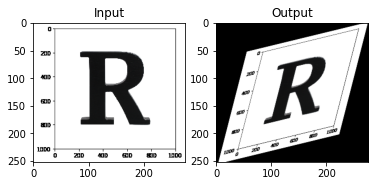

In [5]:
img = cv2.imread('letterR_opecv.png')
rows,cols,ch = img.shape
pts1 = np.float32([[40,10],[257,10],[40,228]])
pts2 = np.float32([[85,52],[257,10],[40,228]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [6]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        pst2 = np.float32([[x,y],[257,10],[40,228]])
        M = cv2.getAffineTransform(pts1,pts2)
        dst = cv2.warpAffine(img,M,(cols,rows))
        cv2.circle(img,(x,y),5,(0,255,0),2)

# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
t = 0
while(1):
    t+=1
    M = cv2.getRotationMatrix2D((cols/2,rows/2),t%360,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

Perspective Transformation

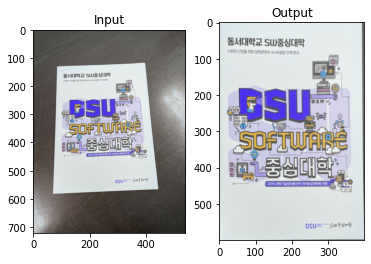

In [51]:
img = cv2.imread('perspective.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[90,130],[400,116],[442,566],[70,580]])
pts2 = np.float32([[0,0],[400,0],[400,600],[0,600]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(400,600))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

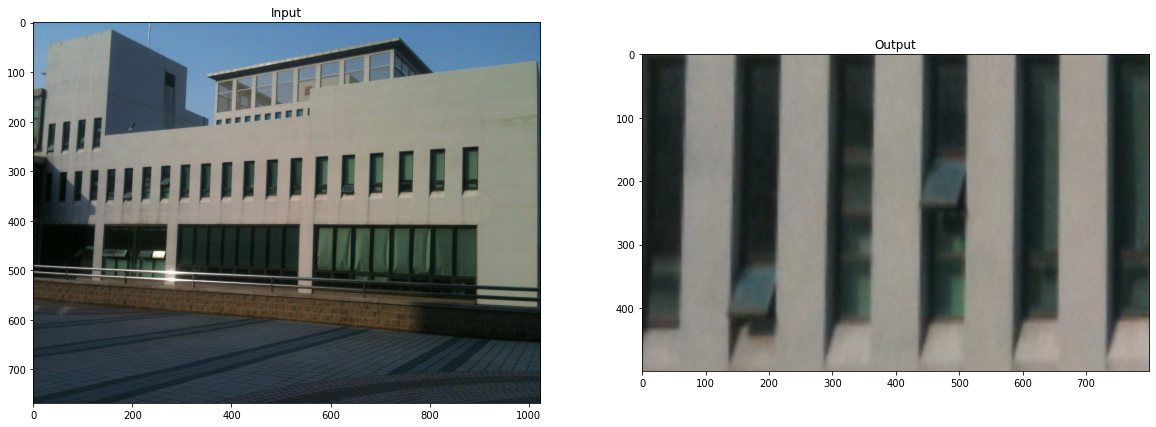

In [69]:
img = cv2.imread('perspective1.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[150,297],[358,285],[355,366],[149,368]])
pts2 = np.float32([[0,0],[800,0],[800,500],[0,500]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(800,500))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img),plt.title('Input')
dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

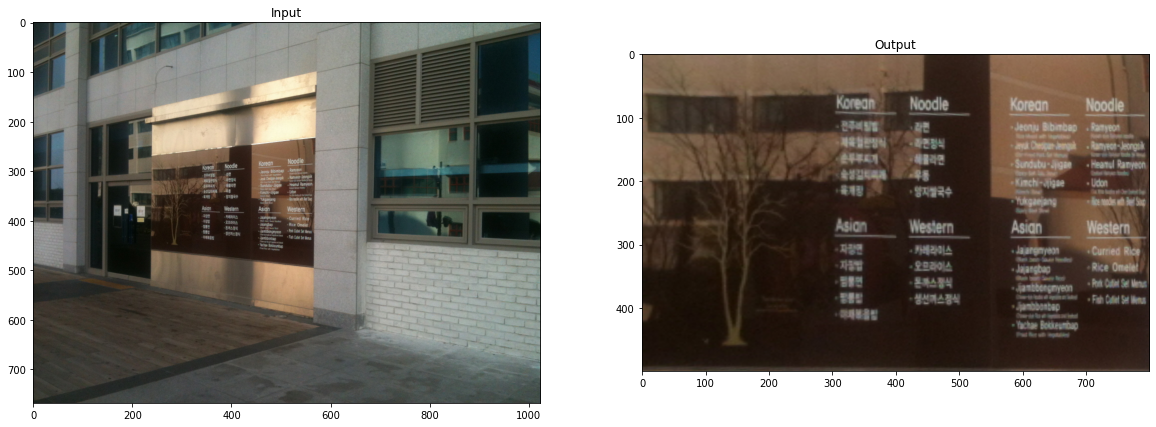

In [68]:
img = cv2.imread('perspective2.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[240,273],[569,234],[563,493],[240,460]])
pts2 = np.float32([[0,0],[800,0],[800,500],[0,500]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(800,500))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img),plt.title('Input')
dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()